In [2]:
# Housing Market Project 1
# Collaborators: Jackie Bai, Rosalyn Brown & Thomas Scott
#Due Date: June 15th, 2021 (presentation - June 8th)

In [168]:
#We probably won't need all of these, but better to have them.
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import csv
import requests
from pathlib import Path
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [169]:
#Import data sets

#Fannie Histrical performance dataset

FM_Hist_Performance = Path('../Data/HistoricalPerformance.csv')

#Fannie Orgination dataset

FM_Historical_Origination = Path('../Data/HistoricalOrigination.csv')

#St. Louis Fed: Fed Funds Rate

Fed_Funds = Path('../Data/FEDFUNDS.csv')

#St. Louis Fed: 30 yr mtg interest rates (remember to weigh against schiller)

Fixed_rate_mtg = Path('../Data/Freddie_Mac_30_yr_Fixed_Rate.csv')

#S&P Schiller home price index

Schiller_index = Path('../Data/CSUSHPINSA.csv')

In [170]:
# Create dataframes

#Fannie Histrical performance

FM_Hist_Performance_df = pd.read_csv(FM_Hist_Performance, encoding='Latin-1')

#Fannie Orgination

FM_Historical_Origination_df = pd.read_csv(FM_Historical_Origination, encoding='Latin-1')

#St. Louis Fed: Fed Funds Rate

Fed_Funds_df = pd.read_csv(Fed_Funds)

#St. Louis Fed: 30 yr mtg interest rates (remember to weigh against schiller)

Fixed_rate_mtg_df = pd.read_csv(Fixed_rate_mtg)

#S&P Schiller home price index

Schiller_index_df = pd.read_csv(Schiller_index)

In [171]:
#Display sample dataframe

Schiller_index_df.head()

,DATE,CSUSHPINSA
0,2000-01-01,104.776083
1,2001-01-01,113.184333
2,2002-01-01,122.286833
3,2003-01-01,133.740750
4,2004-01-01,150.463333


In [172]:
##Merge datasets into consolidated dataframe & drop nulls

Combined_dataframe = pd.concat([FM_Hist_Performance_df, FM_Historical_Origination_df.drop(columns='Unnamed: 0'), Fixed_rate_mtg_df.drop(columns='DATE'), Fed_Funds_df.drop(columns='DATE'), Schiller_index_df.drop(columns='DATE')], axis = 1).dropna()

#Reset index and drop duplicate index
                         
Combined_df = Combined_dataframe.reset_index().drop(columns='index')

#Rename year column

Combined_df.rename(columns = {'Unnamed: 0': 'Year'}, inplace = True)

#Display data

Combined_df.head(21)

#Note to collaborators, all the data/ columns are present in the dataframe. 
#Jupyter just adds the ... to save space and display the data in an abridged format. 
#Try exporting the data to a CSV using 'to_csv' in pandas and you will see what I mean.

,Year,Number of Records,Origination UPB ($M),% Active,% Prepay,% Repurchase,% TPS,% Short Sale,% REO,% NPL,...,Average CLTV,Average DTI,Average Note Rate,% Investor,% Cashout,% CA,WA Risk Layers,MORTGAGE30US,FEDFUNDS,CSUSHPINSA
0,2000,"1,268,238","$160,749",0.21%,94.34%,0.18%,0.10%,0.05%,0.71%,0.01%,...,77.90%,35.40%,8.10%,3.60%,14.30%,14.30%,0.68,8.053462,6.235833,104.776083
1,2001,"3,371,992","$472,779",0.35%,89.92%,0.10%,0.08%,0.05%,0.60%,0.02%,...,73.20%,33.30%,6.85%,3.90%,31.70%,18.10%,0.81,6.967885,3.887500,113.184333
2,2002,"3,857,380","$564,732",0.70%,84.44%,0.10%,0.09%,0.06%,0.60%,0.03%,...,69.90%,32.90%,6.31%,4.50%,33.70%,19.20%,0.81,6.537308,1.666667,122.286833
3,2003,"5,107,654","$778,021",1.69%,73.00%,0.10%,0.16%,0.13%,0.79%,0.07%,...,67.90%,32.60%,5.54%,4.50%,34.20%,20.90%,0.81,5.826981,1.127500,133.740750
4,2004,"1,744,573","$274,074",2.63%,74.07%,0.15%,0.25%,0.43%,1.66%,0.15%,...,70.90%,35.70%,5.69%,4.10%,34.50%,18.20%,0.94,5.839231,1.349167,150.463333
5,2005,"1,446,029","$252,240",3.46%,73.89%,0.23%,0.38%,1.42%,3.43%,0.27%,...,71.70%,37.60%,5.78%,3.80%,43.40%,14.20%,1.02,5.866731,3.213333,171.779083
6,2006,"1,080,688","$198,677",3.30%,76.35%,0.38%,0.39%,2.22%,4.92%,0.34%,...,72.50%,38.80%,6.39%,4.90%,42.60%,11.80%,1.07,6.413269,4.964167,183.482167
7,2007,"1,252,482","$245,737",3.76%,76.42%,0.83%,0.38%,2.40%,5.34%,0.42%,...,74.30%,38.90%,6.33%,6.10%,41.10%,11.70%,1.08,6.337308,5.019167,179.944250
8,2008,"1,491,789","$315,022",2.96%,82.55%,0.71%,0.19%,1.13%,2.58%,0.23%,...,73.30%,37.90%,5.96%,6.40%,32.00%,18.40%,0.81,6.027170,1.927500,164.062500
9,2009,"2,363,088","$522,072",5.48%,79.26%,0.12%,0.05%,0.15%,0.37%,0.05%,...,67.80%,33.60%,4.91%,2.90%,31.50%,20.90%,0.56,5.036538,0.160000,148.551167


In [173]:
#DF to CSV Combined_df
Combined_df.to_csv(r'Combined_df.csv', index=False, header=True)

In [174]:
#Define functions

In [175]:
#1. Parallel plot of total loan volume & interest rate (Tom)

In [176]:
#2. Create bar plot of FICO scores for period between 2000-2020 (Tom)

In [177]:
#3. Show heatmap correlation for FICO & LTV (remember to remove percentage) (Tom)

In [178]:
#4. Show investor property correlation percentage to cash out refi percentage (Tom)

In [179]:
#5. Interest rate correlated with home price index (weighted) (Tom)

                      Origination UPB ($M)  Active UPB ($M)  Average LTV
Origination UPB ($M)              1.000000         0.817893    -0.201687
Active UPB ($M)                   0.817893         1.000000     0.135929
Average LTV                      -0.201687         0.135929     1.000000


<AxesSubplot:>

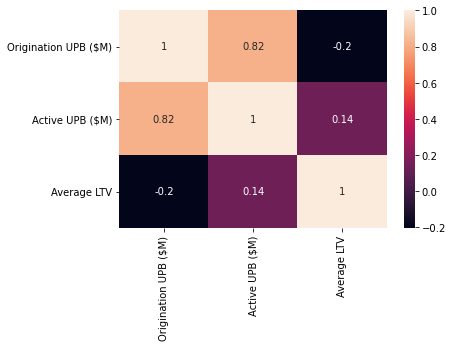

In [180]:
#6. Percent change of orig. UPD in $ with percentage change in LTV (Rosalyn)
percent_change_UPB = Combined_df[['Year', 'Origination UPB ($M)', 'Active UPB ($M)', 'Average LTV']]
percent_change_UPB = percent_change_UPB.loc[:,~percent_change_UPB.columns.duplicated()]
percent_change_UPB['Origination UPB ($M)'] = percent_change_UPB['Origination UPB ($M)'].str.replace(r'\W', '')
percent_change_UPB['Active UPB ($M)'] = percent_change_UPB['Active UPB ($M)'].str.replace(r'\W', '')
percent_change_UPB['Average LTV'] = percent_change_UPB['Average LTV'].str.replace('%', '')
percent_change_UPB[['Origination UPB ($M)', 'Active UPB ($M)', 'Average LTV']] = percent_change_UPB[['Origination UPB ($M)', 'Active UPB ($M)', 'Average LTV']].astype(float)

percent_change_UPB = percent_change_UPB.set_index('Year')
percent_change_corr = percent_change_UPB.corr()
print(percent_change_corr)
percent_change_UPB_heatmap = sns.heatmap(percent_change_corr, annot= True)
percent_change_UPB_heatmap
#pct = percent_change_UPB.pct_change()
#pct_plot = pct.plot.area(stacked=False)
#pct_plot
#.astype(float).pct_change()
#FM_Historical_Origination_df.iloc[:,6] = FM_Historical_Origination_df.iloc[:,6].str.replace(r'\W' ,"")
#percent_change_UPB = FM_Historical_Origination_df.iloc[:,6].astype(float).pct_change()
#percent_change_UPB = percent_change_UPB*100
#percent_change_UPB      


In [181]:
#6a Percentage Change LTV
Combined_df['Average CLTV'] = Combined_df['Average CLTV'].str.replace(r'\W' ,"")
percentage_change_LTV = Combined_df['Average CLTV'].astype(float).pct_change()
percentage_change_LTV = percentage_change_LTV*100
percentage_change_LTV

0          NaN
1    -6.033376
2    -4.508197
3    -2.861230
4     4.418262
5     1.128350
6     1.115760
7     2.482759
8    -1.345895
9    -7.503411
10    0.589971
11    2.199413
12    0.717360
13    4.700855
14    5.034014
15   -1.683938
16   -2.108037
17    3.364738
18    1.953125
19   -2.681992
20   -6.167979
Name: Average CLTV, dtype: float64

In [182]:
#6b plot
percent_change_UPB.plot.line (10,10)
#percentage_change_LTV.plot.line (10,10)

IndexError: index 10 is out of bounds for axis 0 with size 3

In [ ]:
#7. Plot percent of investment property vs. cash out refi (Rosalyn)
df7= Combined_df[['Year', '% Investor', '% Cashout']]
#df7

df7['% Investor'] = df7['% Investor'].str.replace('%'," ")
df7['% Cashout'] = df7['% Cashout'].str.replace('%', " ")
df7=df7.astype(float)
#df7.plot.line (0, 10)
df7
df7.hvplot.line(
            
)
#Investment_Comparison = Investment_Comparison[['% Investor', '% Cashout']].astype(float)
#Investment_Comparison
#Pct_Investor = Combined_df['% Investor'].astype(float)
#Pct_Investor = Pct_Investorsd
#Pct_Investor.plot.line ( 10)
#print(Pct_Investor)

#Pct_Cashout = Combined_df['% Cashout'].str.replace(r'\W',"")
#Pct_Cashout = Pct_Cashout.astype(float)
#Pct_Cashout


#Pct_Cashout.plot.line (10,10)



<AxesSubplot:>

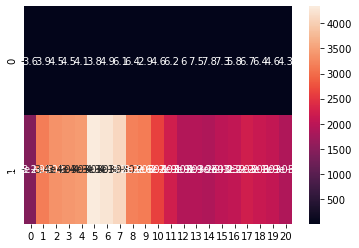

In [183]:
#8. Correlate investor/ cashout refi and show as a heat map (Rosalyn)
Investor_Cashout = pd.concat([Pct_Investor, Pct_Cashout], axis=1, join='inner')
Investor_Cashout = Investor_Cashout.astype(float)
Investor_Cashout_Corr = Investor_Cashout.corr(method='pearson')
#I can't get the %Cashout correct to get the visual correct
sns.heatmap([Pct_Investor, Pct_Cashout], annot=True)

<AxesSubplot:xlabel='Year'>

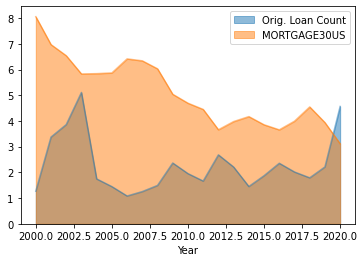

In [184]:
#9. Plot interest rate against number of loans (weight number of loans by dividing by number of million and casting to float)
#(Rosalyn)
Loan_Count_df = Combined_df[['Year', 'Orig. Loan Count', 'MORTGAGE30US']]
Loan_Count_df['Orig. Loan Count'] = Loan_Count_df['Orig. Loan Count'].str.replace(',','').astype(float) / 1000000
Loan_Count_df = Loan_Count_df.set_index('Year')
Loan_Count_plot = Loan_Count_df.plot.area(stacked=False)
Loan_Count_plot
#Combined_df['Orig. Loan Count'] = Combined_df['Orig. Loan Count'].replace(',', '')
#Combined_df['Number of Records'] = pd.to_numeric(Combined_df['Number of Records'])
#Combined_df['Number of Records']
                                


#df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'], errors='coerce')

#pct_chge_loan = Combined_df['Number of Records'].astype(float)
#print(pct_chge_loan)
#pct_chge_loan.plot.line ()

#yr30_chge_rate = Combined_df['MORTGAGE30US'].astype(float).pct_change()
#yr30_chge_rate.plot.line ()




                  Orig. Loan Count  MORTGAGE30US
Orig. Loan Count          1.000000     -0.134751
MORTGAGE30US             -0.134751      1.000000


<AxesSubplot:>

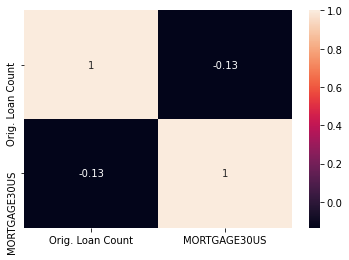

In [185]:
Loan_Count_corr = Loan_Count_df.corr()
print(Loan_Count_corr)
Loan_Corr_Heatmap = sns.heatmap(Loan_Count_corr, annot=True)
Loan_Corr_Heatmap

              % Prepay  MORTGAGE30US
% Prepay      1.000000      0.865153
MORTGAGE30US  0.865153      1.000000


<AxesSubplot:>

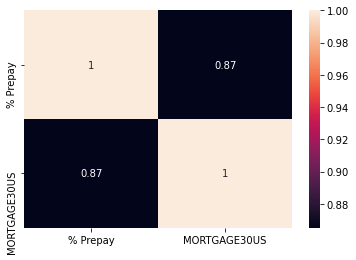

In [197]:
#10. Plot prepayment percentage versus interest rate (Rosalyn)
prepayment_pct = Combined_df[['% Prepay', 'MORTGAGE30US']]
prepayment_pct['% Prepay'] = prepayment_pct['% Prepay'].str.replace('%', '')
prepayment_pct['% Prepay'] = prepayment_pct['% Prepay'].astype(float)
prepayment_pct_corr = prepayment_pct.corr()
print(prepayment_pct_corr)
prepayment_pct_heatmap = sns.heatmap(prepayment_pct_corr, annot=True)
prepayment_pct_heatmap

#yr30_rate = Combined_df['MORTGAGE30US'].astype(float)
#yr30_rate

#prepay_yr30rate = pd.concat([prepayment_pct, yr30_rate], axis=1, join='inner')
#prepay_yr30rate = prepay_yr30rate.corr(method='pearson')
#prepayment_pct.plot.line ()


In [187]:
#11. Prepayment versus Case-Schiller index (prepayment down as asset prices increase) (Jackie)

In [22]:
#12. Plot loan volume vs. LTV (Jackie)

In [23]:
#13. Plot FICO vs. Loan volume (Jackie)

In [19]:
#14. Plot DTI vs. LTV (Jackie)

In [20]:
#15. Plot DTI vs. FICO (Jackie)

In [21]:
#16. Plotly widget 1 (group)

In [22]:
#17. Plotly widget 2 (group)

In [ ]:
#18. Bonus 
#Lagging indicators - US GDP from Quandl API
#Leading indicators - Russell 3000  ETF data from Alpaca API, unemployment figures from Quandle & CPI from BLS.gov